## Heart Disease Classification
### Implementation of a Machine Learning Model Scikit-learn

In this notebook, we will build a classifcation model on the UCI Hear Disease Dataset. The UCI Heart Disease dataset is a popular dataset for machine learning and statistical analysis, used to predict heart disease presence based on several medical and demographic attributes. It is part of the UCI Machine Learning Repository and includes data collected from various sources, such as Cleveland, Hungary, Switzerland, and the VA Medical Center.

For further details visit the link below

- [UCI Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease)

### About the dataset Variables
- **Age**: Age of the individual in years.
- **Sex**: 
  - 1 = Male
  - 0 = Female
- **Chest Pain Type (cp)**:
  - 1: Typical angina
  - 2: Atypical angina
  - 3: Non-anginal pain
  - 4: Asymptomatic
- **Resting Blood Pressure (trestbps)**: In mm Hg on admission to the hospital.
- **Cholesterol (chol)**: Serum cholesterol in mg/dl.
- **Fasting Blood Sugar (fbs)**: 
  -  120 mg/dl (1 = True; 0 = False)
- **Rest ECG (restecg)**:
  - 0: Normal
  - 1: Having ST-T wave abnormality
  - 2: Showing probable or definite left ventricular hypertrophy
- **Maximum Heart Rate Achieved (thalach)**
- **Exercise-Induced Angina (exang)**: 
  - 1 = Yes
  - 0 = No
- **ST Depression Induced by Exercise (oldpeak)**: Measured in comparison to rest.
- **Slope of the Peak Exercise ST Segment (slope)**:
  - 1: Upsloping
  - 2: Flat
  - 3: Downsloping
- **Number of Major Vessels (ca)**: Colored by fluoroscopy (0–3).
- **Thalassemia (thal)**:
  - 3 = Normal
  - 6 = Fixed defect
  - 7 = Reversible defect
- **State (Target Column)**:
  - 0 No hearth disease
  - (1-4) severity increasing as the value increases.


### Importing Required Packages

In [1]:
#for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#for handling data
import pandas as pd
import numpy as np

#for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing data
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#for modelling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#for evaluating model
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

#for tuning
from sklearn.model_selection import GridSearchCV

#package settings
%matplotlib inline
sns.set()

### Loading data

In [3]:
df=pd.read_csv('heart_disease_dataset.csv')

### Checking first 5 rows

In [7]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
0,63.0,M,tap,145.0,233.0,yes,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,M,asp,160.0,286.0,no,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,M,asp,120.0,229.0,no,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,M,nap,130.0,250.0,no,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,F,aap,130.0,204.0,no,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0


### Checking dimensions of the dataset

In [10]:
df.shape

(303, 14)

### Removing samples where all features are empty and the heart disease is not diagnosed

In [13]:
df=df.dropna(how='all')

### Checking dimensions of the dataset again

In [16]:
df.shape

(295, 14)

### Checking missing data in features column

In [19]:
df.isna().sum()

age         0
sex         0
cp          3
trestbps    0
chol        2
fbs         0
restecg     0
thalach     4
exang       0
oldpeak     0
slope       0
ca          4
thal        0
state       2
dtype: int64

### Displaying missing data rows

In [22]:
df[df.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,state
6,62.0,F,NaN,140.0,268.0,no,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3.0
67,54.0,M,nap,150.0,232.0,no,2.0,165.0,0.0,1.6,1.0,0.0,7.0,NaN
115,41.0,M,NaN,135.0,NaN,no,0.0,NaN,0.0,0.0,2.0,NaN,6.0,0.0
116,58.0,M,nap,140.0,211.0,yes,2.0,NaN,0.0,0.0,1.0,0.0,3.0,0.0
132,29.0,M,NaN,130.0,204.0,no,2.0,202.0,0.0,0.0,1.0,0.0,3.0,0.0
165,57.0,M,asp,132.0,207.0,no,0.0,168.0,1.0,0.0,1.0,NaN,7.0,NaN
218,64.0,F,asp,130.0,303.0,no,0.0,NaN,0.0,2.0,2.0,2.0,3.0,0.0
223,53.0,M,asp,123.0,282.0,no,0.0,95.0,1.0,2.0,2.0,NaN,7.0,3.0
228,54.0,M,asp,110.0,NaN,no,2.0,108.0,1.0,0.0,2.0,1.0,3.0,3.0
290,67.0,M,nap,152.0,212.0,no,2.0,NaN,0.0,0.8,2.0,0.0,7.0,1.0


- **chol and thalach are the continous columns with missing values.**
- **cp,  ca and state are the cotegorical columns with missing values.** 

In [25]:
#Replacing the missing values of continous variables with lowest values and for categorical column with most mode, this seems more appropriate
df['chol']=df['chol'].fillna(df['chol'].min())
df['thalach']=df['thalach'].fillna(df['thalach'].min())
df['cp'] = df['cp'].fillna(df['cp'].mode()[0])
df['ca'] = df['ca'].fillna(df['ca'].mode()[0])
df['state'] = df['state'].fillna(df['state'].mode()[0])

### Checking datatypes

In [28]:
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
state       float64
dtype: object

### Correcting datatypes

In [31]:
df['age']=df['age'].astype('int64')
df['restecg']=df['restecg'].astype('int64')
df['exang']=df['exang'].astype('int64')
df['slope']=df['slope'].astype('int64')
df['ca']=df['ca'].astype('int64')
df['thal']=df['thal'].astype('int64')
df['state']=df['state'].astype('int64')

### Data Exploration (Checking Distributions of each column)

In [34]:
categorical_columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'state']
numerical_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

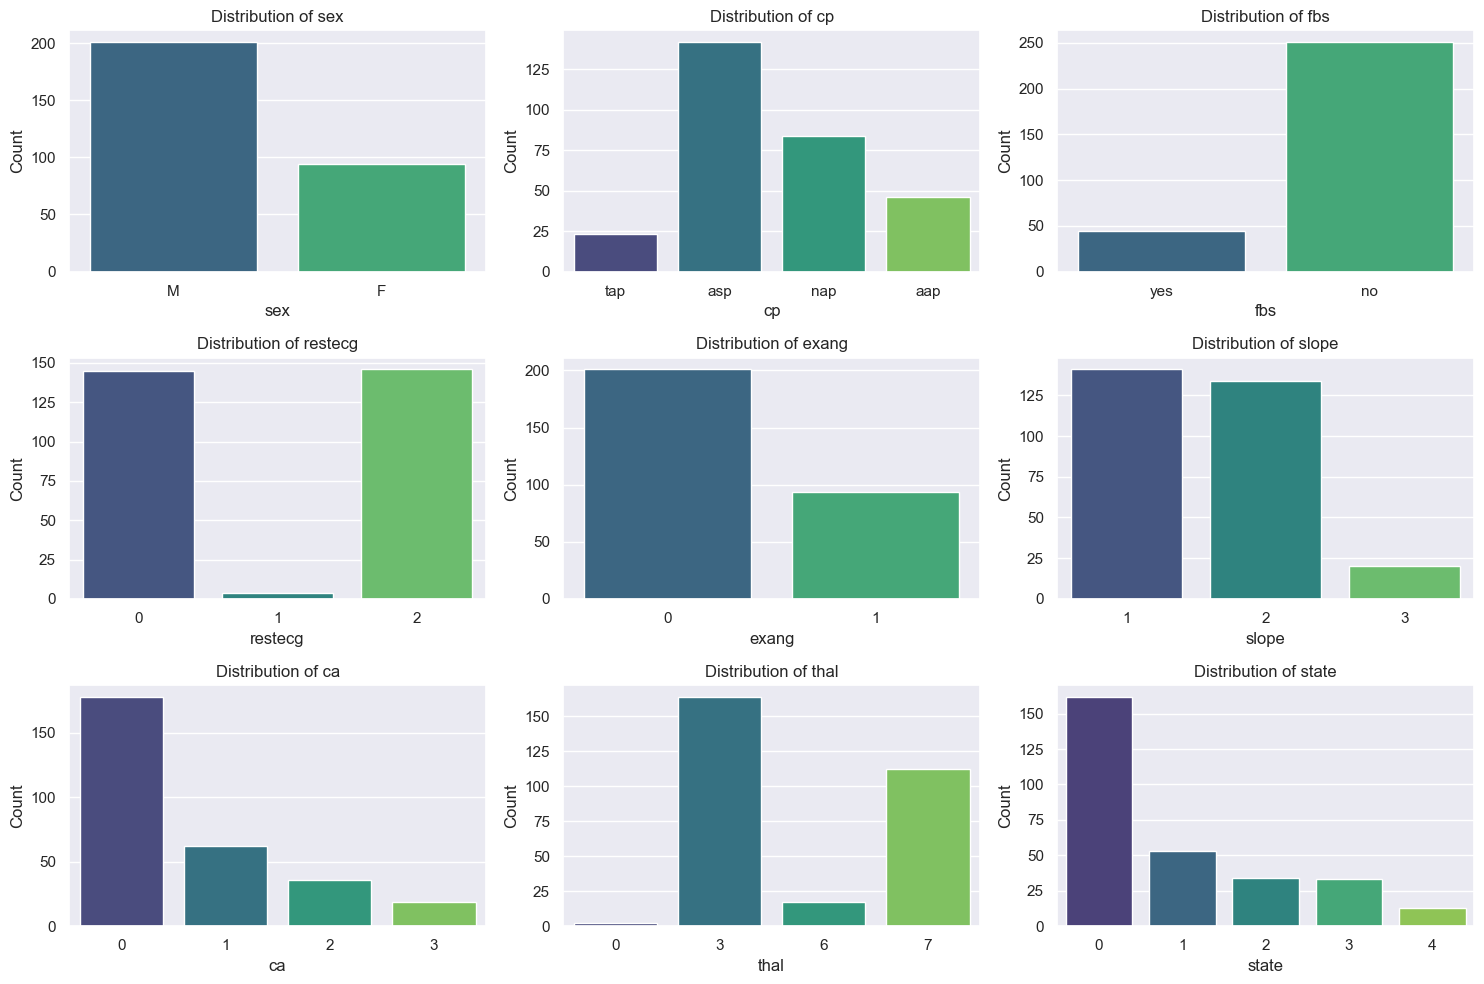

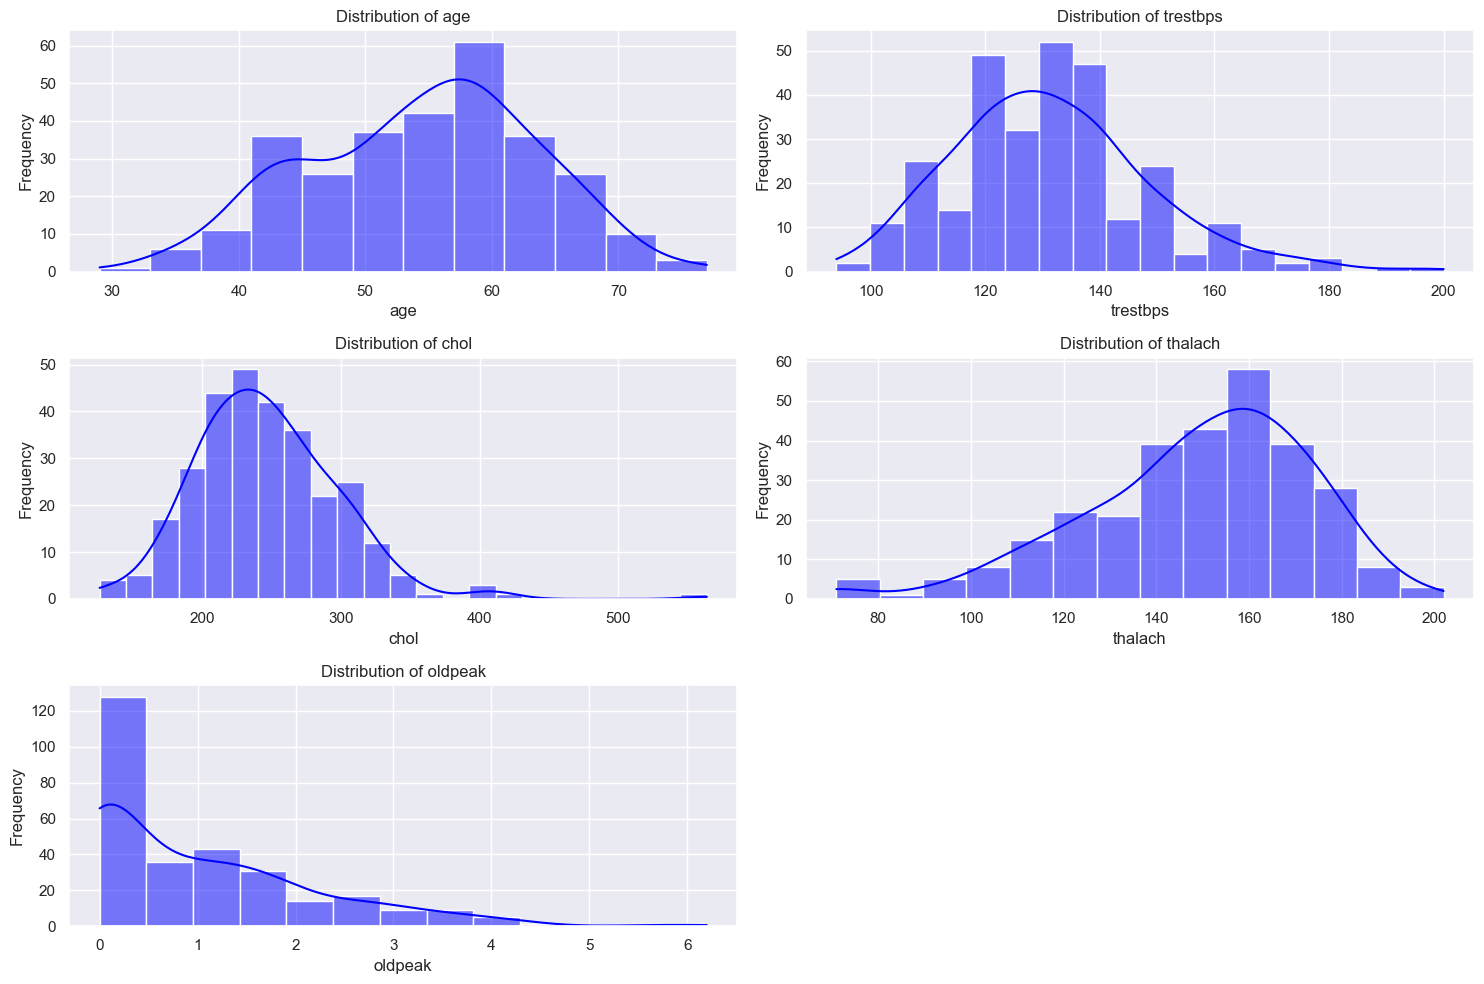

In [36]:
# Plot distributions for categorical columns
plt.figure(figsize=(15, 10))  
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)  
    sns.countplot(data=df, x=col, palette="viridis")  
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Plot distributions for numerical columns
plt.figure(figsize=(15, 10))  
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 2, i)  
    sns.histplot(data=df, x=col, kde=True, color='blue')  
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


### Normalize Numerical Variables

In [39]:
#normalizing using MinMaxScaler in sklearn
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [41]:
#checking dataset after normalization
df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].head()

,age,trestbps,chol,thalach,oldpeak
0,0.708333,0.481132,0.244292,0.603053,0.370968
1,0.791667,0.622642,0.365297,0.282443,0.241935
2,0.791667,0.245283,0.235160,0.442748,0.419355
3,0.166667,0.339623,0.283105,0.885496,0.564516
4,0.250000,0.339623,0.178082,0.770992,0.225806


### One-Hot encode the data

In [44]:
categorical_columns.remove('state')
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [46]:
#checking dataset after one-hot encode
df.shape

(295, 22)

In [48]:
df.head()

,age,trestbps,chol,thalach,oldpeak,state,sex_M,cp_asp,cp_nap,cp_tap,...,restecg_2,exang_1,slope_2,slope_3,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7
0,0.708333,0.481132,0.244292,0.603053,0.370968,0,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
1,0.791667,0.622642,0.365297,0.282443,0.241935,2,True,True,False,False,...,True,True,True,False,False,False,True,True,False,False
2,0.791667,0.245283,0.235160,0.442748,0.419355,1,True,True,False,False,...,True,True,True,False,False,True,False,False,False,True
3,0.166667,0.339623,0.283105,0.885496,0.564516,0,True,False,True,False,...,False,False,False,True,False,False,False,True,False,False
4,0.250000,0.339623,0.178082,0.770992,0.225806,0,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False


### Converting Target Column to Binary Classifier for Heart Disease

In [51]:
df['state'] = df['state'].apply(lambda x: 1 if x > 0 else 0)

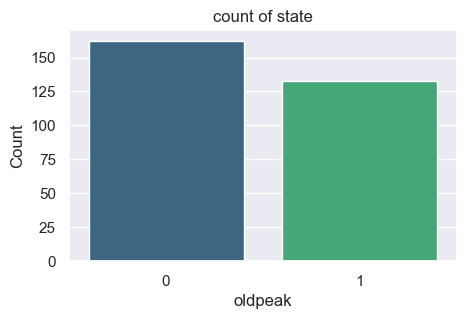

In [53]:
plt.figure(figsize=(5, 3)) 
sns.countplot(data=df, x='state', palette="viridis")  
plt.title(f'count of state')
plt.xlabel(col)
plt.ylabel('Count')
plt.show()

### Seperating Independent and Dependent Variables

In [56]:
X = df.drop(['state'], axis=1)
Y = df[['state']]
print(X.shape)
print(Y.shape)

(295, 21)
(295, 1)


### Train Test Split the Data

Splitting the data into training and testing sets. 70% of data is used for training while 30% for testing


In [60]:
X_train ,X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=25,shuffle=True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(206, 21) (206, 1)
(89, 21) (89, 1)


### Modelling

We try out 5 different classification models and using gridseach algorithm to tune the hyperparameters, the best hyperparameters for each model is selected and the results are displayed in the results dataframe created at the end. The model used are as follows:
- K-Nearest Neighbor (KNN)
- Support Vector Machine (SVM) 
- Logistic Regression
- Decision Tree
- Random Forest

#### Hyperparameter grids for each model for tuning them using gridsearch

In [65]:
# Define the hyperparameter grids for each model
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

param_grid_svm = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'degree': [3, 4, 5]
}

param_grid_log_reg = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'saga'],
    'max_iter': [100, 200, 300],
    'penalty': ['l2', 'none']
}

param_grid_decision_tree = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

param_grid_random_forest = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

#### Initialize Models

In [68]:
knn = KNeighborsClassifier()
svm = SVC()
log_reg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

#### Implementing Gridsearch

This may take some time to tune and find the best fit. We are testing multuple paramerted and at 5 cross validation folds.

In [71]:
# Perform GridSearchCV for each model
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', verbose=1)
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=1)
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, scoring='accuracy', verbose=1)
grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv=5, scoring='accuracy', verbose=1)
grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to each model
grid_search_knn.fit(X_train, y_train)
grid_search_svm.fit(X_train, y_train)
grid_search_log_reg.fit(X_train, y_train)
grid_search_decision_tree.fit(X_train, y_train)
grid_search_random_forest.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_knn = grid_search_knn.best_estimator_
best_svm = grid_search_svm.best_estimator_
best_log_reg = grid_search_log_reg.best_estimator_
best_decision_tree = grid_search_decision_tree.best_estimator_
best_random_forest = grid_search_random_forest.best_estimator_

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 96 candidates, totalling 480 fits
Fitting 5 folds for each of 160 candidates, totalling 800 fits
Fitting 5 folds for each of 720 candidates, totalling 3600 fits


### Best Hyper Parameters Found

In [105]:
print(grid_search_knn.best_estimator_)
print(grid_search_svm.best_estimator_)
print(grid_search_log_reg.best_estimator_)
print(grid_search_decision_tree.best_estimator_)
print(grid_search_random_forest.best_estimator_)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')
SVC(C=1000, gamma='auto')
LogisticRegression(C=1)
DecisionTreeClassifier(min_samples_leaf=2)
RandomForestClassifier(max_depth=40, min_samples_leaf=2)


#### Train and Predict the best models

In [76]:
# Train and predict with KNN (after hyperparameter tuning)
y_pred_knn = best_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Train and predict with SVM (after hyperparameter tuning)
y_pred_svm = best_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Train and predict with Logistic Regression (after hyperparameter tuning)
y_pred_log_reg = best_log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)

# Train and predict with Decision Tree (after hyperparameter tuning)
y_pred_decision_tree = best_decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)
cm_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)

# Train and predict with Random Forest (after hyperparameter tuning)
y_pred_random_forest = best_random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
recall_random_forest = recall_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest)
f1_random_forest = f1_score(y_test, y_pred_random_forest)
cm_random_forest = confusion_matrix(y_test, y_pred_random_forest)

### Results

In [110]:
results = pd.DataFrame({
    'Model': ['KNN', 'SVM', 'Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Testing Accuracy': [accuracy_knn, accuracy_svm, accuracy_log_reg, accuracy_decision_tree, accuracy_random_forest],
    'Testing Recall': [recall_knn, recall_svm, recall_log_reg, recall_decision_tree, recall_random_forest],
    'Testing Precision': [precision_knn, precision_svm, precision_log_reg, precision_decision_tree, precision_random_forest],
    'Testing F1-Score': [f1_knn, f1_svm, f1_log_reg, f1_decision_tree, f1_random_forest]
})

results

,Model,Testing Accuracy,Testing Recall,Testing Precision,Testing F1-Score
0,KNN,0.797753,0.738095,0.815789,0.775000
1,SVM,0.775281,0.761905,0.761905,0.761905
2,Logistic Regression,0.842697,0.809524,0.850000,0.829268
3,Decision Tree,0.764045,0.809524,0.723404,0.764045
4,Random Forest,0.820225,0.833333,0.795455,0.813953


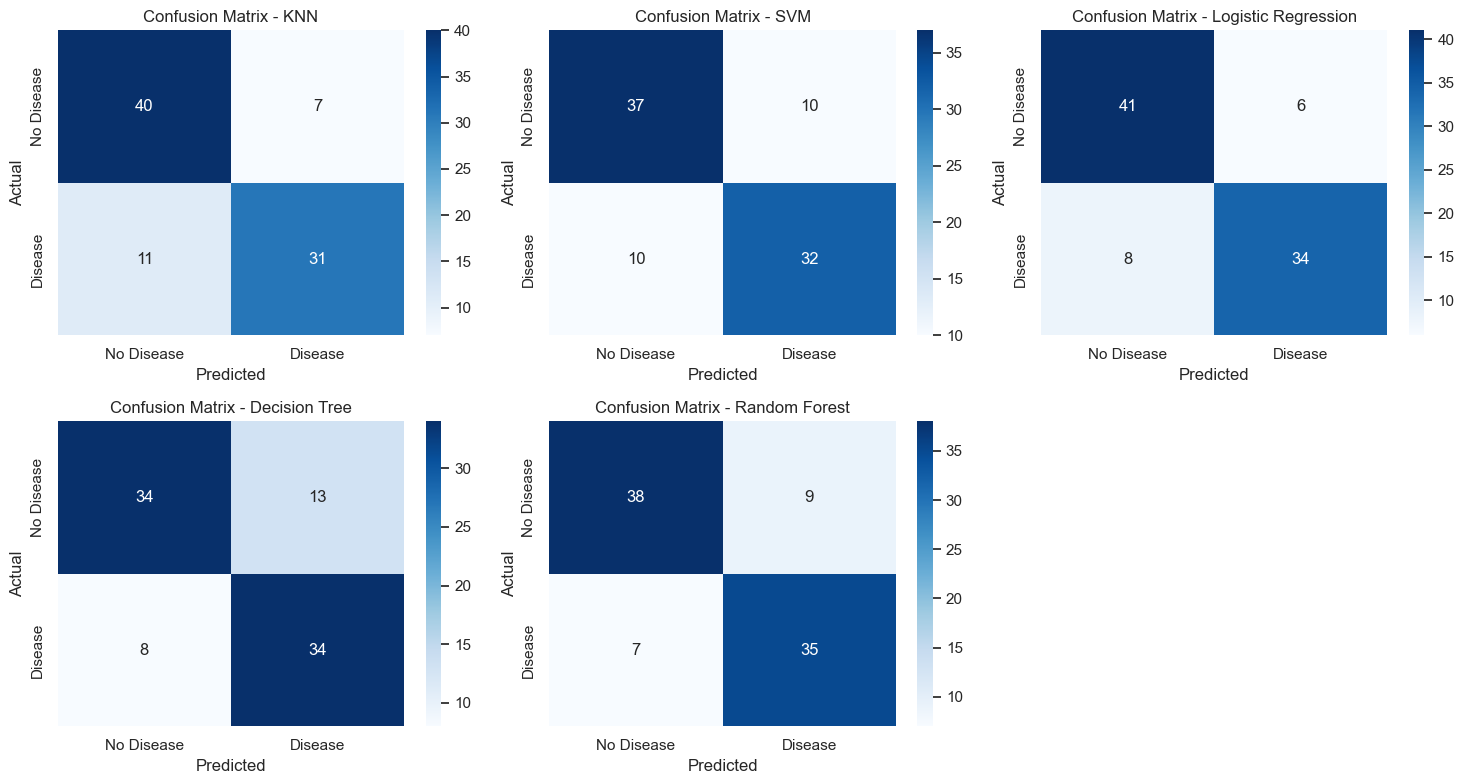

In [96]:
sns.set()
plt.figure(figsize=(15, 8))

# KNN Confusion Matrix
plt.subplot(2, 3, 1)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# SVM Confusion Matrix
plt.subplot(2, 3, 2)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Logistic Regression Confusion Matrix
plt.subplot(2, 3, 3)
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Decision Tree Confusion Matrix
plt.subplot(2, 3, 4)
sns.heatmap(cm_decision_tree, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Random Forest Confusion Matrix
plt.subplot(2, 3, 5)
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

### Concluding Statement

Based on the results, we can see that Logistic Regression is the best performing model in terms of accuracy (84.27%), followed closely by Random Forest with an accuracy of 82.02%. However, Random Forest outperforms all other models in terms of recall (83.33%), which indicates that it is better at identifying positive cases of the disease.

It is better to select Random Forest as our final model because, despite Logistic Regression having a higher accuracy, Random Forest offers a better balance between precision, recall, and F1-score. Additionally, its higher recall rate means it is more effective in detecting positive cases, which is crucial in medical predictions where missing a positive case (false negative) could have serious consequences.